### Test de l'installation

In [1]:
import os
os.getcwd()

'/Users/guillaumelaunay/work/communications/lectures/UCBL/5BIM/protéomique/TP/tp-proteomics/notebook'

<IPython.core.display.Javascript object>


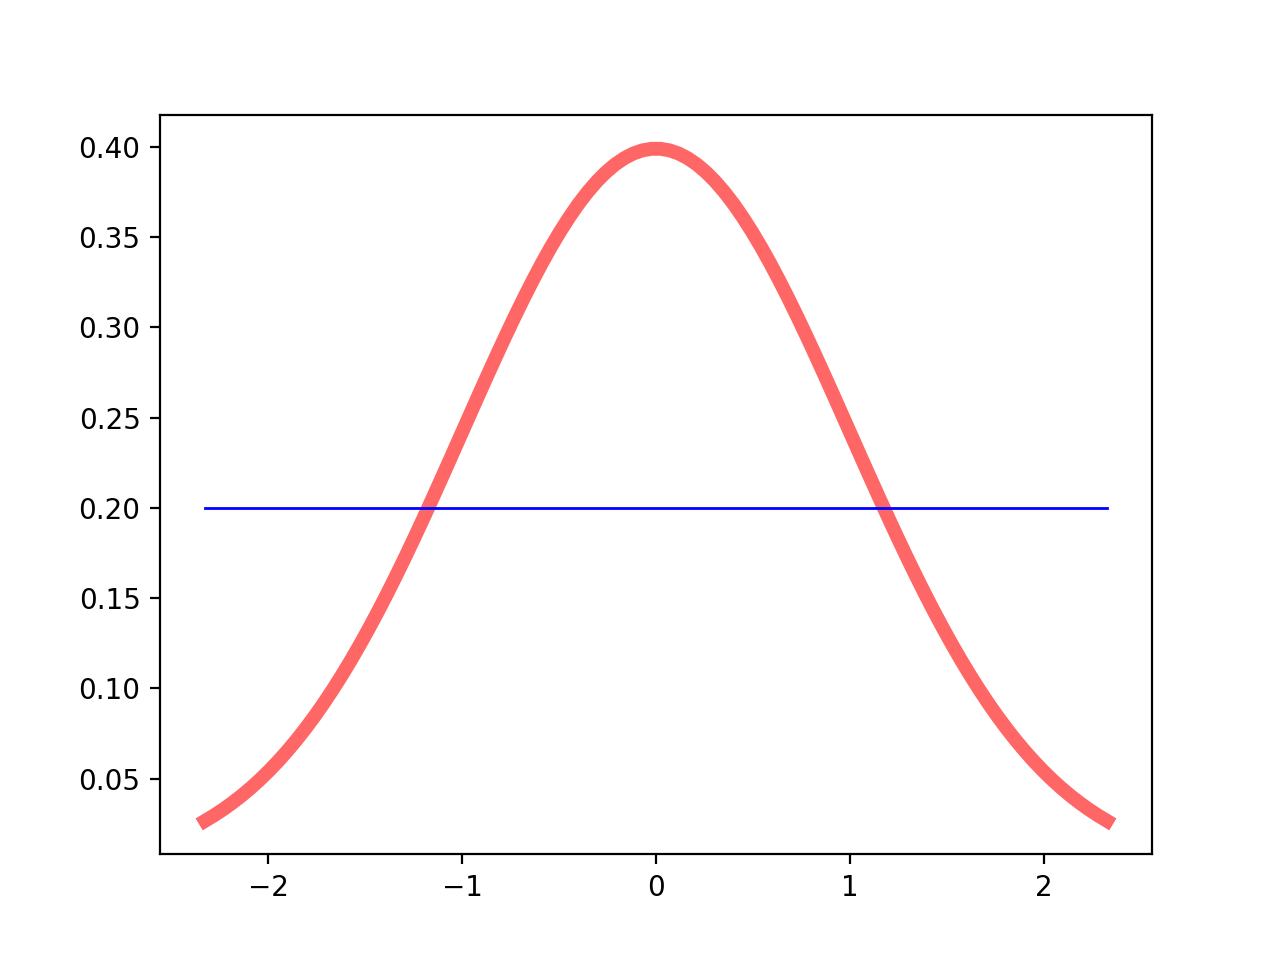

In [2]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

## Lecture XML

In [3]:
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('../data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # add more as needed
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
#dump(proteins[0])
# Find the xml subtree of a protein with accession "P31224"
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P31224":
            dump(entry)
            break

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1993-07-01" modified="2020-08-12" version="187">
<ns0:accession>P31224</ns0:accession>
<ns0:accession>Q2MBW5</ns0:accession>
<ns0:name>ACRB_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>AcrAB-TolC multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Acridine resistance protein B</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">acrB</ns0:name>
<ns0:name type="synonym">acrE</ns0:name>
<ns0:name type="ordered locus">b0462</ns0:name>
<ns0:name type="ordered locus">JW0451</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" id="83333" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteo

<ns0:location>
<ns0:begin position="392" />
<ns0:end position="413" />
</ns0:location>
</ns0:feature>
<ns0:feature type="topological domain" description="Cytoplasmic" evidence="21">
<ns0:location>
<ns0:begin position="414" />
<ns0:end position="438" />
</ns0:location>
</ns0:feature>
<ns0:feature type="transmembrane region" description="Helical; Name=5">
<ns0:location>
<ns0:begin position="439" />
<ns0:end position="457" />
</ns0:location>
</ns0:feature>
<ns0:feature type="topological domain" description="Periplasmic" evidence="21">
<ns0:location>
<ns0:begin position="458" />
<ns0:end position="465" />
</ns0:location>
</ns0:feature>
<ns0:feature type="transmembrane region" description="Helical; Name=6">
<ns0:location>
<ns0:begin position="466" />
<ns0:end position="490" />
</ns0:location>
</ns0:feature>
<ns0:feature type="topological domain" description="Cytoplasmic" evidence="21">
<ns0:location>
<ns0:begin position="491" />
<ns0:end position="538" />
</ns0:location>
</ns0:feature>
<ns0

### Lecture TSV python natif

In [4]:
import re
fileIn="../data/TCL_wt1.tsv"
_ = []
header = None

# Any consecutive tab as delimiter
IFS=re.compile("\t+")

#Check if fields "3:6" of current line can be parsed as float
def convert(l):
    try:
        float(l[3])
        float(l[4])
        float(l[5])
        float(l[6])
    except ValueError:
        return False
    except IndexError:
        return False
    return True

# Open file and parse line, setting header line aside
with open(fileIn, "r") as f:
    header = IFS.split( f.readline().rstrip() )
    _ = filter( convert, [ IFS.split(l.rstrip()) for l in f if not '#VALEUR!' in l ] )

# Do actual converion of floats
data=[]
for d in _:
    d[3] = float(d[3])
    d[4] = float(d[4])
    d[5] = float(d[5])
    d[6] = float(d[6])
    data.append(tuple(d))
    
# Sort data by acending abundance ratio
data = sorted(data, key=lambda x:x[4])
print( len(data) )

1746


### Lecture PANDAS
http://www.python-simple.com/python-pandas/lecture-ecriture-fichier.php

Ca devrait marcher simplement à verifier
    

In [17]:
import pandas

fileIn="../data/TCL_wt1.tsv"
df = pandas.read_csv(fileIn, sep="\t",  dtype = {'Accession': str, 'Description': str, 'Gene Symbol': str, 
                                                 'Corrected Abundance ratio (1.53)': np.float,  'Log2 Corrected Abundance Ratio': np.float, 
                                                 'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)': np.float, '-LOG10 Adj.P-val': np.float})
print(len(df))
df = df["Log2 Corrected Abundance Ratio"].dropna(how="any")
print(len(df))
data = df.tolist() # Converion may be needed to float if above secure parsing cant be achieved

ValueError: could not convert string to float: '#VALEUR!'

### Estimating gaussian parameters , then superimposing histogram and PDF

<IPython.core.display.Javascript object>


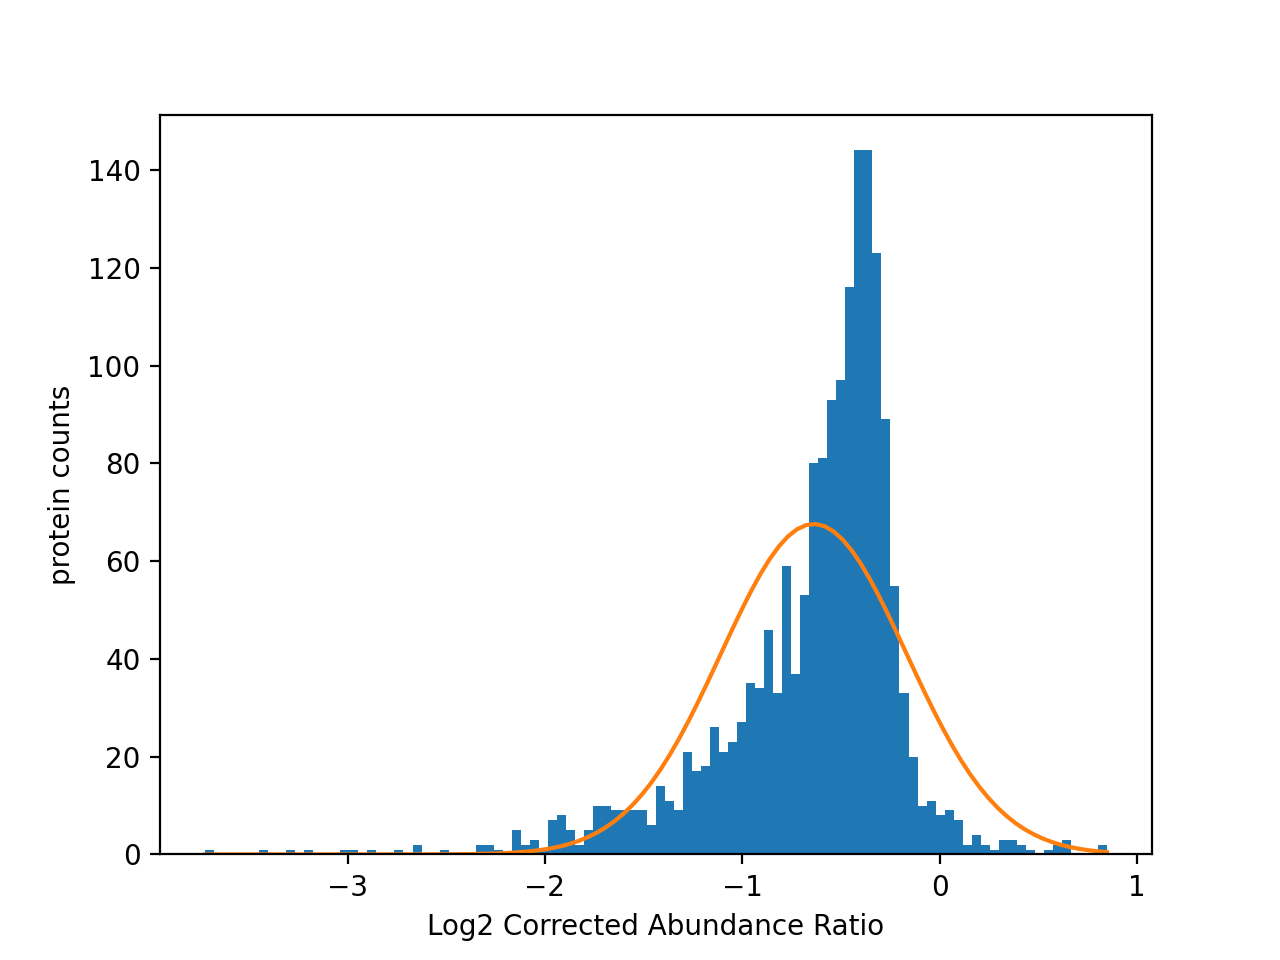

-0.63862621564433 0.22161436206330615


In [20]:
from math import sqrt, pow

fig, ax = plt.subplots()

i = 4
j = 6
_ = [_[i] for _ in data ]

hist = ax.hist(_, bins=100 )
mu = np.mean(_)
S_2 = (len(_) / (len(_) - 1) ) * pow(np.std(_), 2)
sigma=sqrt(S_2)
print(mu, S_2)

x = np.linspace(min(_), max(_), 100)
dx = hist[1][1] - hist[1][0]
scale = len(_)*dx
ax.plot(x, norm.pdf(x, mu, sigma)*scale)

ax.set_xlabel(header[i])
ax.set_ylabel('protein counts')


fig.show()

### Defining overabundant boundaries and represent them on volcano $\text{p_value}=f(FC)$

<IPython.core.display.Javascript object>


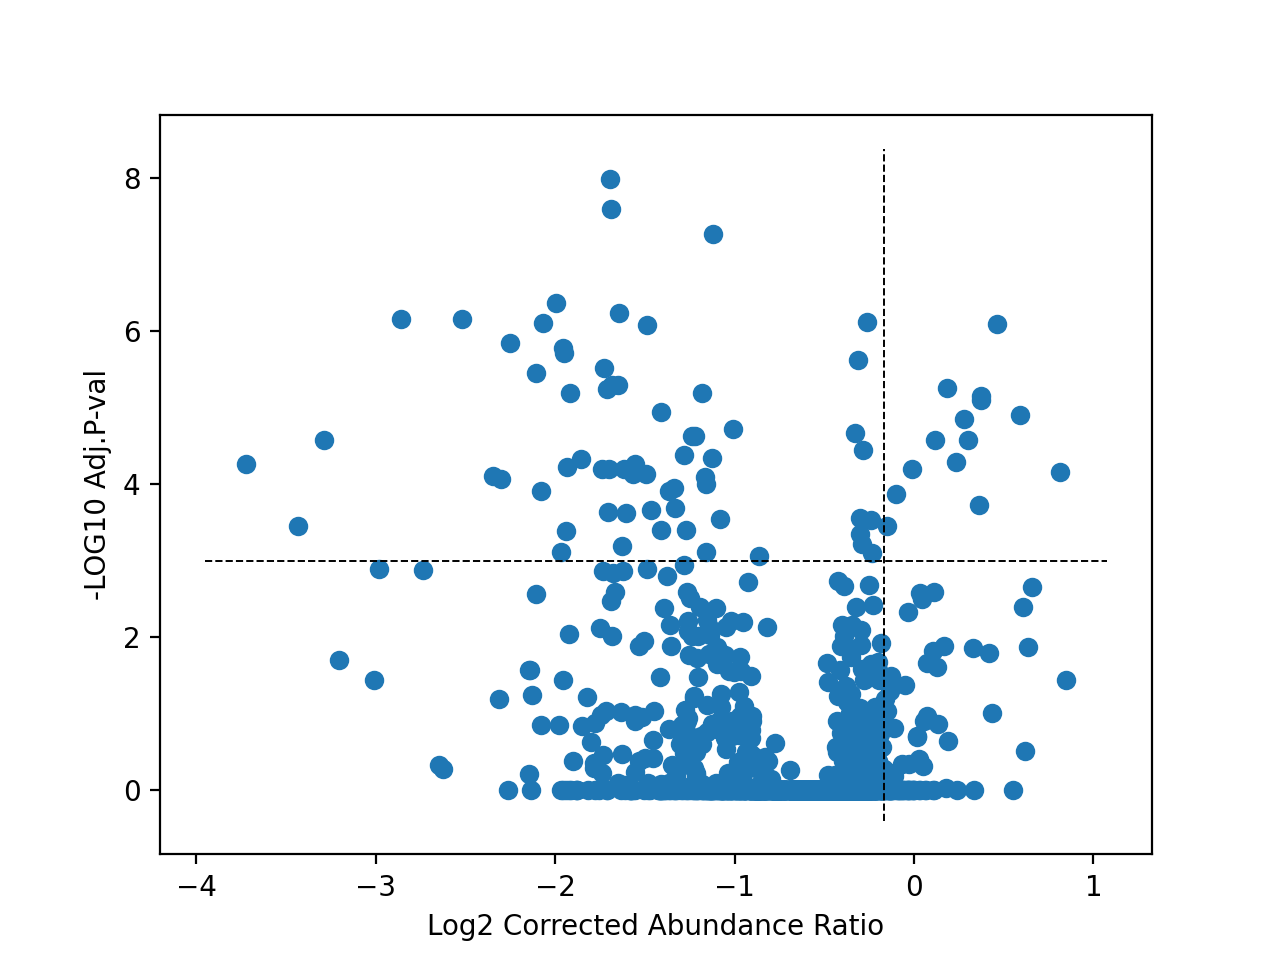

In [22]:
# if native python parsing
i = 4
j = 6
i_thresh =  mu + sigma
j_thresh  =  3 # 0.001

i_thresh = mu + sigma
fig, ax = plt.subplots()
ax.scatter([_[i] for _ in data], [_[j] for _ in data], marker='o')

ax.set_xlabel(header[i])
ax.set_ylabel(header[j])
ax.plot(ax.get_xlim(), (j_thresh, j_thresh), color='black',linestyle="dashed", linewidth=0.7)
ax.plot((i_thresh, i_thresh), ax.get_ylim(), color='black',linestyle="dashed", linewidth=0.7)
fig.show()

In [55]:
goTerms = {
    "GO:0005737" : { "name" : "C:cytoplasm", "count" : 10 }
        ...
    }&


['Accession',
 'Description',
 'Gene Symbol',
 'Corrected Abundance ratio (1.53)',
 'Log2 Corrected Abundance Ratio',
 'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)',
 'LOG10 Adj.P-val']

#### Retrieve abundant uniprot Accessor 

In [29]:
uniprotAbundant = []
for d in filter(lambda x: x[i] > i_thresh and x[j] > j_thresh , data):
    print(d[0], d[1])
    uniprotAbundant.append(d[0])
    

P0A8V6 Fatty acid metabolism regulator protein OS=Escherichia coli (strain K12) OX=83333 GN=fadR PE=1 SV=2
P0A9Q1 Aerobic respiration control protein ArcA OS=Escherichia coli (strain K12) OX=83333 GN=arcA PE=1 SV=1
P02358 30S ribosomal protein S6 OS=Escherichia coli (strain K12) OX=83333 GN=rpsF PE=1 SV=1
P0ACF8 DNA-binding protein H-NS OS=Escherichia coli (strain K12) OX=83333 GN=hns PE=1 SV=2
P62399 50S ribosomal protein L5 OS=Escherichia coli (strain K12) OX=83333 GN=rplE PE=1 SV=2
P0A905 Outer membrane lipoprotein SlyB OS=Escherichia coli (strain K12) OX=83333 GN=slyB PE=2 SV=1
P76506 Probable phospholipid-binding lipoprotein MlaA OS=Escherichia coli (strain K12) OX=83333 GN=mlaA PE=1 SV=1
P13036 Fe(3+) dicitrate transport protein FecA OS=Escherichia coli (strain K12) OX=83333 GN=fecA PE=1 SV=2
P10384 Long-chain fatty acid transport protein OS=Escherichia coli (strain K12) OX=83333 GN=fadL PE=1 SV=5
P06971 Ferrichrome outer membrane transporter/phage receptor OS=Escherichia coli (s

### Retrieve their set of GO terms name and occurence number

In [24]:
def getGOTerms(xmlFile):
    tree = parse(xmlFile)
    root = tree.getroot()
    ns = '{http://uniprot.org/uniprot}'
    entryTerms=root.findall('{http://uniprot.org/uniprot}entry')
    _ = []
    for e in entryTerms:
        goTerms = e.findall('{http://uniprot.org/uniprot}dbReference[@type="GO"]')
        _ += [ (goT.attrib['id'],goT.find(ns+'property[@type="term"]').attrib['value'] ) for goT in goTerms ]
    return _ 
   
goTerms = {}


for id in uniprotAbundant:
    xmlFile = f"../data/{id}.xml"
    #print()
    for (gID, gName) in getGOTerms(xmlFile):
        if not gID in goTerms:
            goTerms[gID] = {"name" : gName, "count" : 0}
        goTerms[gID]['count'] += 1

goTerms

GO:0009279 C:cell outer membrane
GO:0045203 C:integral component of cell outer membrane
GO:0046930 C:pore complex
GO:0046872 F:metal ion binding
GO:0015288 F:porin activity
GO:0001618 F:virus receptor activity
GO:0006974 P:cellular response to DNA damage stimulus
GO:0034220 P:ion transmembrane transport
GO:0015914 P:phospholipid transport
GO:0046813 P:receptor-mediated virion attachment to host cell


In [32]:
def filterEntries(xmlRoot, pList):
    filteredEntry = []
    ns = '{http://uniprot.org/uniprot}'
    entries = xmlRoot.findall(ns + 'entry')
    for currEntry in entries:
        accessions = currEntry.findall(ns+"accession")
        for currAccesion in accessions:
            if currAccesion.text in pList:
                filteredEntry.append(currEntry)
                
    if not len(filteredEntry) == len(pList):
        raise(f"Uneven list sizes i:{len(pList)} o:{len(filteredEntry)}")
    return filteredEntry

def getGOTerms(xmlEntry, acc):
    ns = '{http://uniprot.org/uniprot}'
    goTerms = xmlEntry.findall(ns +'dbReference[@type="GO"]')
    for goT in goTerms:
        gID   = goT.attrib['id']
        gName = goT.find(ns +'property[@type="term"]').attrib['value']
        if not gID in acc:
            acc[gID] = {"name" : gName, "count" : 0}
        
        acc[gID]['count'] += 1
    return acc
    
tree = parse("../data/uniprot-proteome_UP000000625.xml")
root = tree.getroot()
abundantEntries = filterEntries(root, uniprotAbundant)

goTerms = {}
for e in abundantEntries:
    goTerms = getGOTerms(e, goTerms)
print(goTerms)

{'GO:0009279': {'name': 'C:cell outer membrane', 'count': 8}, 'GO:0045203': {'name': 'C:integral component of cell outer membrane', 'count': 1}, 'GO:0046930': {'name': 'C:pore complex', 'count': 3}, 'GO:0046872': {'name': 'F:metal ion binding', 'count': 2}, 'GO:0015288': {'name': 'F:porin activity', 'count': 3}, 'GO:0001618': {'name': 'F:virus receptor activity', 'count': 1}, 'GO:0006974': {'name': 'P:cellular response to DNA damage stimulus', 'count': 2}, 'GO:0034220': {'name': 'P:ion transmembrane transport', 'count': 3}, 'GO:0015914': {'name': 'P:phospholipid transport', 'count': 1}, 'GO:0046813': {'name': 'P:receptor-mediated virion attachment to host cell', 'count': 1}, 'GO:0005829': {'name': 'C:cytosol', 'count': 6}, 'GO:0030288': {'name': 'C:outer membrane-bounded periplasmic space', 'count': 1}, 'GO:0046870': {'name': 'F:cadmium ion binding', 'count': 1}, 'GO:0008270': {'name': 'F:zinc ion binding', 'count': 1}, 'GO:0071276': {'name': 'P:cellular response to cadmium ion', 'coun

In [ ]:
### Asses pvalue of reported pathway

In [34]:
import json
jsonGoFile = '../data/EColiK12_GOcounts.json'

# K : current go term occurence in total proteome
# k : number of abundant proteins with current go term
# N : proteome size
# n : number of abundant proteins

goStats = {}
with open(jsonGoFile, 'r') as f:
    goStats = json.load(f)

N = goStats['total_proteins']
n = len(uniprotAbundant)

from scipy.stats import hypergeom

results = []
for goID, goDatum in goTerms.items():
    K = goStats['go_terms'][goID]['count']
    k = goTerms[goID]['count']
    #print(N,n,K,k)
    p_value = 1.0 - hypergeom.cdf(k - 1, N, K, n)
    results.append( (goID, goTerms[goID]['name'], p_value, k) )

sorted(results, key=lambda x:x[2])

[('GO:0009279', 'C:cell outer membrane', 4.2278114342764184e-10, 8),
 ('GO:0034220', 'P:ion transmembrane transport', 5.583727299862673e-06, 3),
 ('GO:0046930', 'C:pore complex', 2.4271721519308898e-05, 3),
 ('GO:0015288', 'F:porin activity', 2.850123274567018e-05, 3),
 ('GO:0038023', 'F:signaling receptor activity', 0.00014059362830243227, 2),
 ('GO:0015344',
  'F:siderophore uptake transmembrane transporter activity',
  0.0002614858350119542,
  2),
 ('GO:0055072', 'P:iron ion homeostasis', 0.0007218134333636383, 2),
 ('GO:0001217',
  'F:DNA-binding transcription repressor activity',
  0.002716145165351791,
  2),
 ('GO:0045892',
  'P:negative regulation of transcription, DNA-templated',
  0.0027407407367546766,
  3),
 ('GO:0046813',
  'P:receptor-mediated virion attachment to host cell',
  0.0031883397897817245,
  1),
 ('GO:0034702', 'C:ion channel complex', 0.0031883397897817245, 1),
 ('GO:0015075',
  'F:ion transmembrane transporter activity',
  0.0031883397897817245,
  1),
 ('GO:00

### Compute Global GO statistics

In [94]:
from os import listdir
from os.path import isfile, join
myPath = "..//data/K12_proteome"
XfileList = [join(myPath, f) for f in listdir(myPath) if isfile(join(myPath, f))]

In [36]:
import json
jsonOutFile = '../data/EColiK12_GOcounts.json'

tree = parse("../data/uniprot-proteome_UP000000625.xml")
xmlRoot = tree.getroot()
ns = '{http://uniprot.org/uniprot}'
entries = xmlRoot.findall(ns + 'entry')

K12_goTerms = {}
for e in entries:
    K12_goTerms = getGOTerms(e, K12_goTerms)

In [37]:
print( len(K12_goTerms.keys()), " go terms found" )
data = { "specie" : "E.Coli K12", "total_proteins" : 4391, "go_terms" : K12_goTerms}
with open (jsonOutFile, "w") as f:
    json.dump(data, f, indent=2, sort_keys=True)

3901  go terms found
